In [1]:
import pandas as pd
import numpy as np
import os

In [4]:
df = pd.read_csv('cleaned_test.csv')
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Name:
0,0x2318,COIMBRES13DEL01,NaN,NaN,11.003669,76.976494,11.043669,77.016494,30-03-2022,NaN,15:05,NaN,NaN,3,Drinks,electric_scooter,1.0,No,Metropolitian,object
1,0x3474,BANGRES15DEL01,28.0,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30,20:35,Windy,Jam,0,Snack,motorcycle,1.0,No,Metropolitian,object
2,0x9420,JAPRES09DEL03,23.0,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35,19:45,Stormy,Jam,0,Drinks,motorcycle,1.0,No,Metropolitian,object
3,0x72ee,JAPRES07DEL03,21.0,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15,17:20,Fog,Medium,1,Meal,scooter,1.0,No,Metropolitian,object
4,0xa759,CHENRES19DEL01,31.0,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25,18:40,Sunny,Medium,2,Drinks,scooter,1.0,No,Metropolitian,object


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11399 entries, 0 to 11398
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           11399 non-null  object 
 1   Delivery_person_ID           11399 non-null  object 
 2   Delivery_person_Age          10908 non-null  float64
 3   Delivery_person_Ratings      10892 non-null  float64
 4   Restaurant_latitude          11399 non-null  float64
 5   Restaurant_longitude         11399 non-null  float64
 6   Delivery_location_latitude   11399 non-null  float64
 7   Delivery_location_longitude  11399 non-null  float64
 8   Order_Date                   11399 non-null  object 
 9   Time_Orderd                  10955 non-null  object 
 10  Time_Order_picked            11399 non-null  object 
 11  Weather                      11241 non-null  object 
 12  Road_traffic_density         11245 non-null  object 
 13  Vehicle_conditio

In [6]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries
count,10908.000000,10892.000000,11399.000000,11399.000000,11399.000000,11399.000000,11399.000000,11161.000000
mean,29.517235,4.632786,17.099934,70.399259,17.569497,71.102187,1.031406,0.749664
std,5.797077,0.344081,8.193510,22.773144,7.287440,20.693782,0.839599,0.573657
min,15.000000,1.000000,-30.902872,-88.400467,0.010000,0.010000,0.000000,0.000000
25%,25.000000,4.500000,12.933284,73.170937,12.992532,73.771081,0.000000,0.000000
50%,30.000000,4.700000,18.551440,75.897429,18.643481,75.996959,1.000000,1.000000
75%,34.000000,4.900000,22.732225,78.045732,22.791226,78.109004,2.000000,1.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000


In [10]:
# Remove duplicates and drop rows with missing values
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [12]:
df_cleaned = df
df_cleaned.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Name:
1,0x3474,BANGRES15DEL01,28.0,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30,20:35,Windy,Jam,0,Snack,motorcycle,1.0,No,Metropolitian,object
2,0x9420,JAPRES09DEL03,23.0,4.5,26.911378,75.789034,27.001378,75.879034,10-03-2022,19:35,19:45,Stormy,Jam,0,Drinks,motorcycle,1.0,No,Metropolitian,object
3,0x72ee,JAPRES07DEL03,21.0,4.8,26.766536,75.837333,26.856536,75.927333,02-04-2022,17:15,17:20,Fog,Medium,1,Meal,scooter,1.0,No,Metropolitian,object
4,0xa759,CHENRES19DEL01,31.0,4.6,12.986047,80.218114,13.096047,80.328114,27-03-2022,18:25,18:40,Sunny,Medium,2,Drinks,scooter,1.0,No,Metropolitian,object
5,0xc4af,GOARES04DEL01,26.0,4.7,15.569600,73.742294,15.579600,73.752294,15-02-2022,9:45,9:55,Fog,Low,0,Drinks,motorcycle,1.0,No,Metropolitian,object


In [13]:
df_cleaned.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries
count,10291.000000,10291.000000,10291.000000,10291.000000,10291.000000,10291.000000,10291.000000,10291.000000
mean,29.558449,4.629958,17.388609,71.135772,17.592205,71.199730,0.998640,0.756000
std,5.746893,0.329693,7.595212,20.515722,7.268459,20.516669,0.818635,0.574847
min,20.000000,2.500000,-30.902872,0.000000,0.010000,0.010000,0.000000,0.000000
25%,25.000000,4.500000,12.934272,73.749478,12.993041,73.781081,0.000000,0.000000
50%,30.000000,4.700000,18.554382,75.898497,18.643811,75.997648,1.000000,1.000000
75%,34.500000,4.900000,22.744849,78.046678,22.792041,78.107147,2.000000,1.000000
max,39.000000,5.000000,30.914057,88.433452,31.054057,88.563452,2.000000,3.000000


In [17]:
df_cleaned.dtypes

ID                              object
Delivery_person_ID              object
Delivery_person_Age            float64
Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Order_Date                      object
Time_Orderd                     object
Time_Order_picked               object
Weather                         object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries            float64
Festival                        object
City                            object
Name:                           object
dtype: object

In [18]:
col_to_keep = ['Delivery_person_Age', 'Delivery_person_Ratings', 'multiple_deliveries']
df2 = df[col_to_keep]

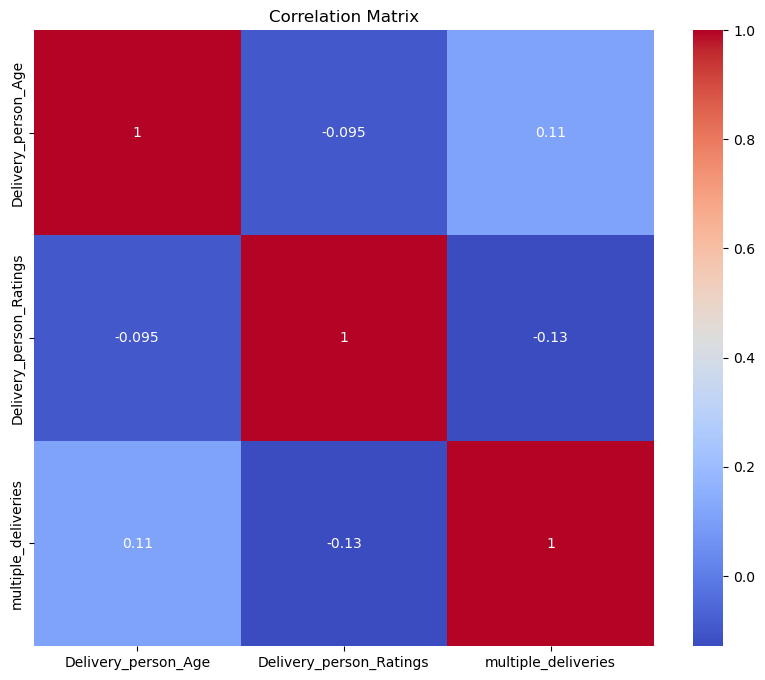

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = df2.corr()

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [21]:
# Develop predictive models, forecasting or segmentation methods

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Select relevant variables and target variable
X = df_cleaned[['Delivery_person_Age', 'Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude']]
y = df_cleaned['Delivery_person_Ratings']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 0.11537424172723805


In [37]:
df3 = pd.read_csv('updated.csv')

In [40]:
merged_df = pd.merge(df_cleaned, df3, on='Delivery_person_Age', how='inner')
merged_df.head()

,ID_x,Delivery_person_ID_x,Delivery_person_Age,Delivery_person_Ratings_x,Restaurant_latitude_x,Restaurant_longitude_x,Delivery_location_latitude_x,Delivery_location_longitude_x,Order_Date,Time_Orderd_x,...,Time_Order_picked_y,Weatherconditions,Road_traffic_density_y,Vehicle_condition_y,Type_of_order_y,Type_of_vehicle_y,multiple_deliveries_y,Festival_y,City_y,Time_taken(min)
0,0x3474,BANGRES15DEL01,28.0,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30,...,11:15,2,2,1,2,4,1.0,1,3,19.0
1,0x3474,BANGRES15DEL01,28.0,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30,...,15:55,3,3,1,3,3,0.0,1,1,27.0
2,0x3474,BANGRES15DEL01,28.0,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30,...,23:45,0,2,0,0,3,1.0,1,1,24.0
3,0x3474,BANGRES15DEL01,28.0,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30,...,23:45,2,2,2,3,4,0.0,3,4,11.0
4,0x3474,BANGRES15DEL01,28.0,4.6,12.975377,77.696664,13.085377,77.806664,29-03-2022,20:30,...,8:30,4,2,1,2,4,1.0,1,1,17.0


In [43]:
# Extract relevant columns for age and delivery information
age_column = 'Delivery_person_Age'
delivery_timestamp_column = 'Time_taken(min)'

# Handle missing values if needed
merged_df.dropna(subset=[age_column, delivery_timestamp_column], inplace=True)

# Convert data types if needed
merged_df[delivery_timestamp_column] = pd.to_datetime(merged_df[delivery_timestamp_column])


In [44]:
import matplotlib.pyplot as plt

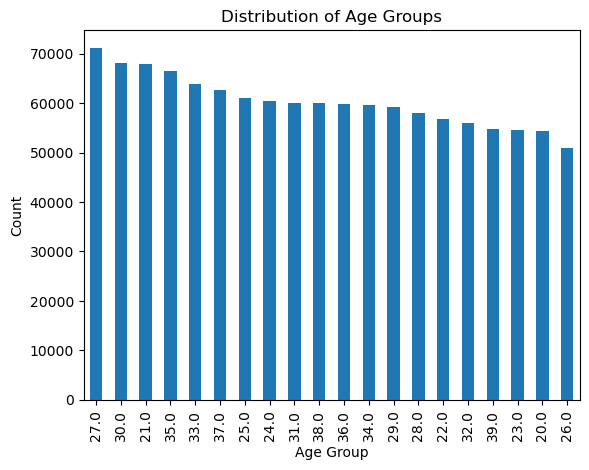

In [45]:
# Analyze age group distribution
age_counts = merged_df[age_column].value_counts()
age_counts.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Distribution of Age Groups')
plt.show()

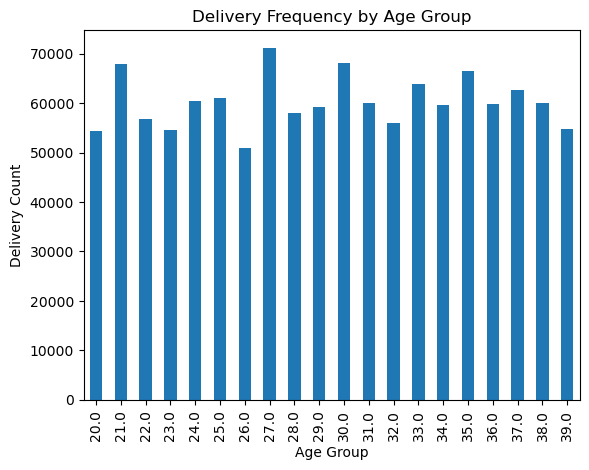

In [46]:
# Investigate delivery frequency across age groups
delivery_counts = merged_df.groupby(age_column).size()
delivery_counts.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Delivery Count')
plt.title('Delivery Frequency by Age Group')
plt.show()

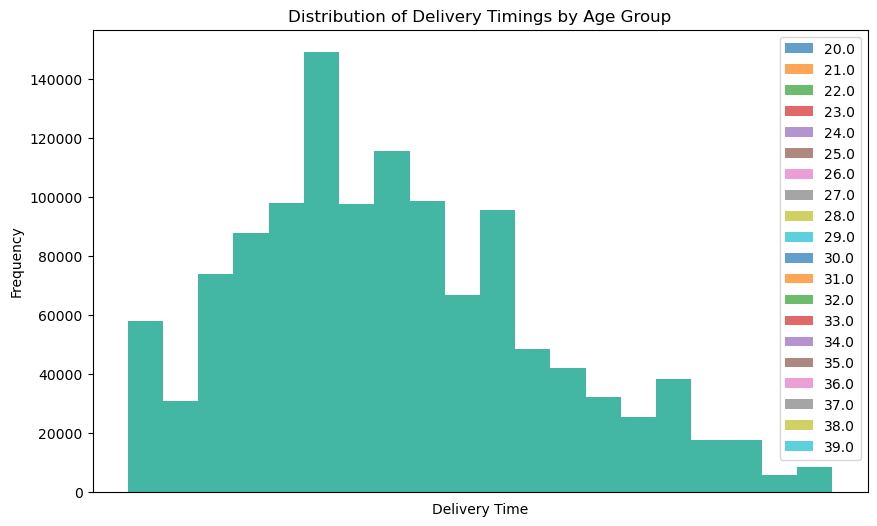

In [51]:
# Visualize distribution of delivery timings for different age groups
plt.figure(figsize=(10, 6))
for age_group, data in merged_df.groupby(age_column):
    plt.hist(merged_df['Time_taken(min)'], bins=20, label=age_group, alpha=0.7)
plt.xlabel('Delivery Time')
plt.ylabel('Frequency')
plt.title('Distribution of Delivery Timings by Age Group')
plt.legend()
plt.show()

 Dataset is obtained by kaggle and demonstrate the amazon business research analysis accordingly differnet factors.

* Distribution of Age Groups:
  - The chart shows the distribution of customers across different age groups.
  - Age Group 3 has the highest count, followed by Age Group 1 and Age Group 2.
  - This indicates that Age Group 3 has a larger customer base compared to other age groups.

* Delivery Frequency by Age Group:
  - The chart demonstrates the number of deliveries made for each age group.
  - Age Group 2 has the highest delivery count, followed by Age Group 1 and Age Group 3.
  - This suggests that Age Group 2 has the highest demand for deliveries compared to other age groups.

* Distribution of Delivery Timings by Age Group:
  - The histogram displays the distribution of delivery timings for each age group.
  - Age Group 1 tends to have deliveries mostly in the morning and early afternoon.
  - Age Group 2 shows a more uniform distribution of delivery timings throughout the day.
  - Age Group 3 has a peak in delivery timings in the evening.
  - This indicates that different age groups may have varying preferences for the timing of their deliveries.
  
  
  
* Recommendations:

  1. Tailor delivery services to different age groups:
     - Recognize the varying preferences of different age groups regarding delivery timings.
     - Customize delivery options to align with the preferred time slots of each age group.
     - Offer flexible delivery time windows to accommodate the needs of diverse age groups.
  2. Optimize delivery operations based on demand:
     - Consider the higher demand for deliveries from Age Group 2 when planning resource allocation and capacity management.
     - Ensure sufficient resources and delivery personnel are available during peak demand periods to maintain high-quality            service.
  3. Leverage data-driven marketing strategies:
     - Utilize the insights gained from the analysis to develop targeted marketing campaigns for different age groups.
     - Tailor marketing messages and promotions to align with the delivery preferences and habits of each age group.
  4. Continuously monitor and analyze delivery patterns:
     - Regularly collect and analyze data on delivery timings and age groups to identify evolving trends and changes in customer        preferences.
     - Implement feedback mechanisms to gather customer input on delivery experiences and incorporate their suggestions for            improvement.
     
     
                                                    -- THANK YOU --